In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.1.0-rc1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)** 

In [0]:
import pandas as pd
import h5py
data = h5py.File('/content/drive/My Drive/greatlearning/SVHN_single_grey1.h5','r')

In [23]:
list(data.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [45]:
X_test = np.array(data['X_test'])
X_test.shape

(18000, 32, 32)

In [46]:
X_train = np.array(data['X_train'])
X_train.shape

(42000, 32, 32)

In [47]:
X_val = np.array(data['X_val'])
X_val.shape

(60000, 32, 32)

In [48]:
y_test = np.array(data['y_test'])
y_test.shape

(18000,)

In [49]:
y_train = np.array(data['y_train'])
y_train.shape

(42000,)

In [50]:
y_val = np.array(data['y_val'])
y_val.shape

(60000,)

**Data fetching and understand the train/val/test splits. (5 points)**

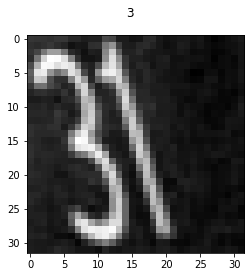

In [51]:
import matplotlib.pyplot as plt

img_num = np.random.randint(0,X_test.shape[0])
plt.imshow(X_test[img_num],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()

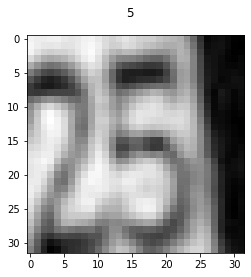

In [52]:
import matplotlib.pyplot as plt

img_num = np.random.randint(0,X_val.shape[0])
plt.imshow(X_val[img_num],cmap='gray')
plt.suptitle(str(y_val[img_num]))
plt.show()

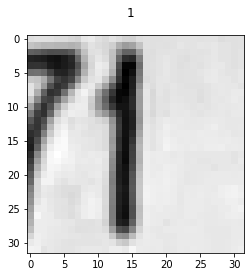

In [53]:
import matplotlib.pyplot as plt

img_num = np.random.randint(0,X_test.shape[0])
plt.imshow(X_test[img_num],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()

**Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (10 points)**

Reshape

In [56]:
x_train_reshape = X_train.reshape(42000, 1024)
print(x_train_reshape.shape)
x_test_reshape = X_test.reshape(18000, 1024)
print(x_test_reshape.shape)
x_val_reshape = X_val.reshape(60000, 1024)
print(x_val_reshape.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)


One hot Vector

In [0]:
y_train_enc = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_enc = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val_enc = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [58]:
y_train_enc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
y_test_enc

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [60]:
y_val_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

Normalize Data

In [0]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
x_train_nor = transformer.fit_transform(x_train_reshape)
x_test_nor = transformer.transform(x_test_reshape)
x_val_nor = transformer.transform(x_val_reshape)

**Creating Simple Deap Learning Neural Network Model**

In [0]:
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
model.fit(x_train_nor,y_train_enc,          
          validation_data=(x_val_nor,y_val_enc),
          epochs=30,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 8s 191us/sample - loss: 2.2795 - accuracy: 0.2072 - val_loss: 2.2743 - val_accuracy: 0.2218
Epoch 2/30
42000/42000 [==============================] - 8s 181us/sample - loss: 2.2683 - accuracy: 0.2255 - val_loss: 2.2599 - val_accuracy: 0.2270
Epoch 3/30
42000/42000 [==============================] - 8s 182us/sample - loss: 2.2486 - accuracy: 0.2304 - val_loss: 2.2338 - val_accuracy: 0.2419
Epoch 4/30
42000/42000 [==============================] - 8s 189us/sample - loss: 2.2110 - accuracy: 0.2427 - val_loss: 2.1843 - val_accuracy: 0.2424
Epoch 5/30
42000/42000 [==============================] - 8s 191us/sample - loss: 2.1395 - accuracy: 0.2629 - val_loss: 2.0900 - val_accuracy: 0.2747
Epoch 6/30
42000/42000 [==============================] - 8s 190us/sample - loss: 2.0294 - accuracy: 0.2928 - val_loss: 1.9631 - val_accuracy: 0.3111
Epoch 7/30
42000/42000 [==========================

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             multiple                  205000    
_________________________________________________________________
dense_11 (Dense)             multiple                  20100     
_________________________________________________________________
dense_12 (Dense)             multiple                  6060      
_________________________________________________________________
dense_13 (Dense)             multiple                  1830      
_________________________________________________________________
dense_14 (Dense)             multiple                  310       
Total params: 233,300
Trainable params: 233,300
Non-trainable params: 0
_________________________________________________________________


tried batch sise 28 and 32, epoc between 10 to 30.

**Print the classification accuracy metrics**

In [78]:
model.evaluate(x_test_nor,y_test_enc)

18000/18000 [==============================] - 1s 50us/sample - loss: 1.0594 - accuracy: 0.6590


[1.059435790962643, 0.659]

**1. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)**
**2. Implement batch normalization for training the neural network (5 points)**
**3. Print the classification accuracy metrics**


using batch normalization model

In [0]:
model1 = Sequential()
model1.add(Dense(200, activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(100, activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(60, activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(30, activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(10, activation='softmax'))

In [0]:
model1.compile(optimizer='SGD', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
model1.fit(x_train_nor,y_train_enc,          
          validation_data=(x_val_nor,y_val_enc),
          epochs=15,
          batch_size=10)

Train on 42000 samples, validate on 60000 samples
Epoch 1/15
42000/42000 [==============================] - 24s 583us/sample - loss: 1.3012 - accuracy: 0.5914 - val_loss: 0.7718 - val_accuracy: 0.7620
Epoch 2/15
42000/42000 [==============================] - 24s 573us/sample - loss: 1.1462 - accuracy: 0.6400 - val_loss: 0.6994 - val_accuracy: 0.7815
Epoch 3/15
42000/42000 [==============================] - 24s 577us/sample - loss: 1.0925 - accuracy: 0.6565 - val_loss: 0.6769 - val_accuracy: 0.7937
Epoch 4/15
42000/42000 [==============================] - 24s 576us/sample - loss: 1.0575 - accuracy: 0.6681 - val_loss: 0.6275 - val_accuracy: 0.8081
Epoch 5/15
42000/42000 [==============================] - 24s 578us/sample - loss: 1.0244 - accuracy: 0.6819 - val_loss: 0.6401 - val_accuracy: 0.8038
Epoch 6/15
42000/42000 [==============================] - 24s 577us/sample - loss: 1.0004 - accuracy: 0.6891 - val_loss: 0.6421 - val_accuracy: 0.8011
Epoch 7/15
42000/42000 [====================

accuracy has increased from 65% to 85%, used batch size 32, 64 and 10

In [89]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             multiple                  205000    
_________________________________________________________________
batch_normalization_4 (Batch multiple                  800       
_________________________________________________________________
dense_11 (Dense)             multiple                  20100     
_________________________________________________________________
batch_normalization_5 (Batch multiple                  400       
_________________________________________________________________
dense_12 (Dense)             multiple                  6060      
_________________________________________________________________
batch_normalization_6 (Batch multiple                  240       
_________________________________________________________________
dense_13 (Dense)             multiple                 

**Print the classification accuracy metrics**

In [90]:
model1.evaluate(x_test_nor,y_test_enc)

18000/18000 [==============================] - 1s 60us/sample - loss: 0.5807 - accuracy: 0.8265


[0.580693595621321, 0.8265]